In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
arr = np.array(
    [[-2, -2,  2,  2],
     [ 2, -2, -2,  2]])
arr

array([[-2, -2,  2,  2],
       [ 2, -2, -2,  2]])

In [4]:
arr[0][[0,-1]]

array([-2,  2])

In [5]:
def plot(arr: np.ndarray):
    lim = np.max(np.abs(arr))
    x_min, x_max = np.min(arr[0]), np.max(arr[0])
    y_min, y_max = np.min(arr[1]), np.max(arr[1])
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax.scatter(arr[0], arr[1], color="red")
    ax.plot(arr[0], arr[1], color="blue")
    ax.plot(arr[0][[0, -1]], arr[1][[0, -1]], color="blue")
    ax.set_xlim(x_min - lim//2, x_max + lim //2)
    ax.set_ylim(y_min - lim//2, y_max + lim//2)
    plt.grid()
    plt.show()
    


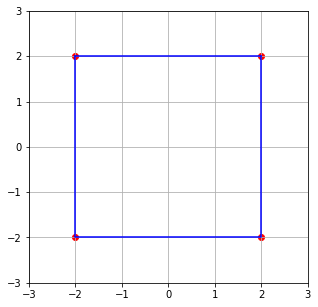

In [6]:
plot(arr)

## Scaling

### Along x

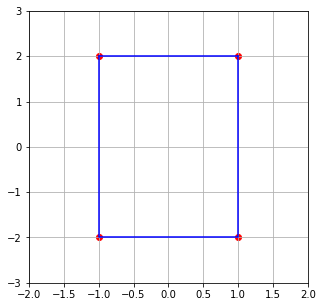

In [7]:
mat = np.array([[.5, 0], [0, 1]])
plot(mat @ arr)

### Along y 

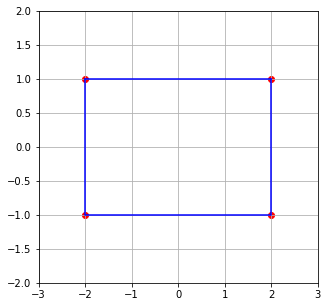

In [8]:
mat = np.array([[1, 0], [0, .5]])
plot(mat @ arr)

## Shearing

### Along x

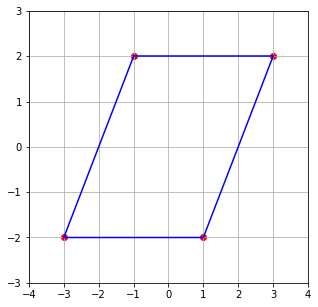

In [9]:
mat = np.array(
    [[1, 0.5],
     [0, 1]])
plot(mat @ arr)

### Along y

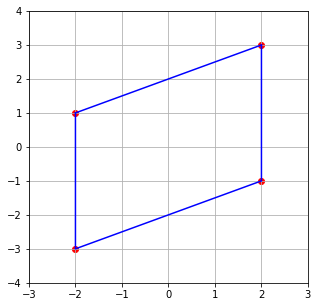

In [10]:
mat = np.array(
    [[1, 0.],
     [0.5, 1]])
plot(mat @ arr)

# Example of affine transformation

In [11]:
from PIL import Image
import cv2

In [12]:
from biomedical_image_segmentation.transforms.elastic_deform_v2 import AffineTransform
from biomedical_image_segmentation.utils import plot_images

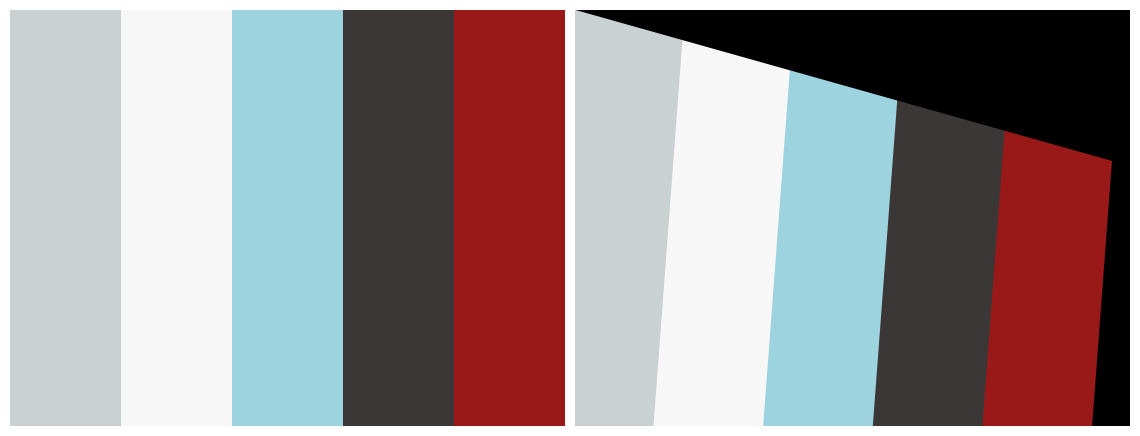

In [26]:
# img = Image.open("/home/mittal.nit/projects/biomedical_image_segmentation/data/samples/train/0.tif")
img = Image.open("clipart2772093.png")
img_arr = np.array(img)
# img_arr = np.stack([img_arr]*3, axis=2)


aff = AffineTransform(scale_xy=1., shear_xy=.1, translate_xy=0, angle=10, border_mode=cv2.BORDER_CONSTANT)
trnsf_img_arr = aff.transform(img_arr)
if img_arr.shape[-1]==1:
    img_arr = img_arr.squeeze(axis=-1)
    trnsf_img_arr = trnsf_img_arr.squeeze(axis=-1)
plot_images([Image.fromarray(img_arr), Image.fromarray(trnsf_img_arr)])

In [29]:
class Foo:
    """Sample docstring."""
    pass
    def getBar(self,):
        """Docstring for getbar"""
        
def is_documented_by(original):
    def wrapper(target):
        target.__doc__ = original.__doc__
        return target
    return wrapper

class Waldo:
    @is_documented_by(Foo.getBar)
    def getBar():
        pass

In [30]:
w = Waldo()

In [ ]:
w.getBar()